In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = sns.load_dataset("iris")

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [44]:
df = pd.get_dummies(df)

<Axes: >

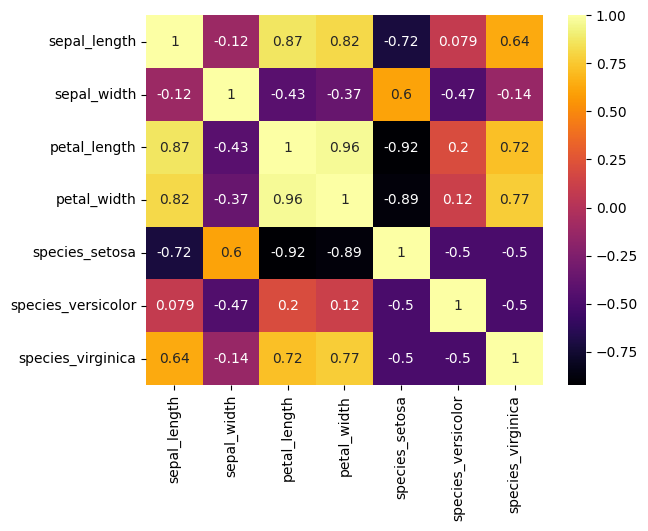

In [45]:
sns.heatmap(df.corr(), annot=True, cmap="inferno")

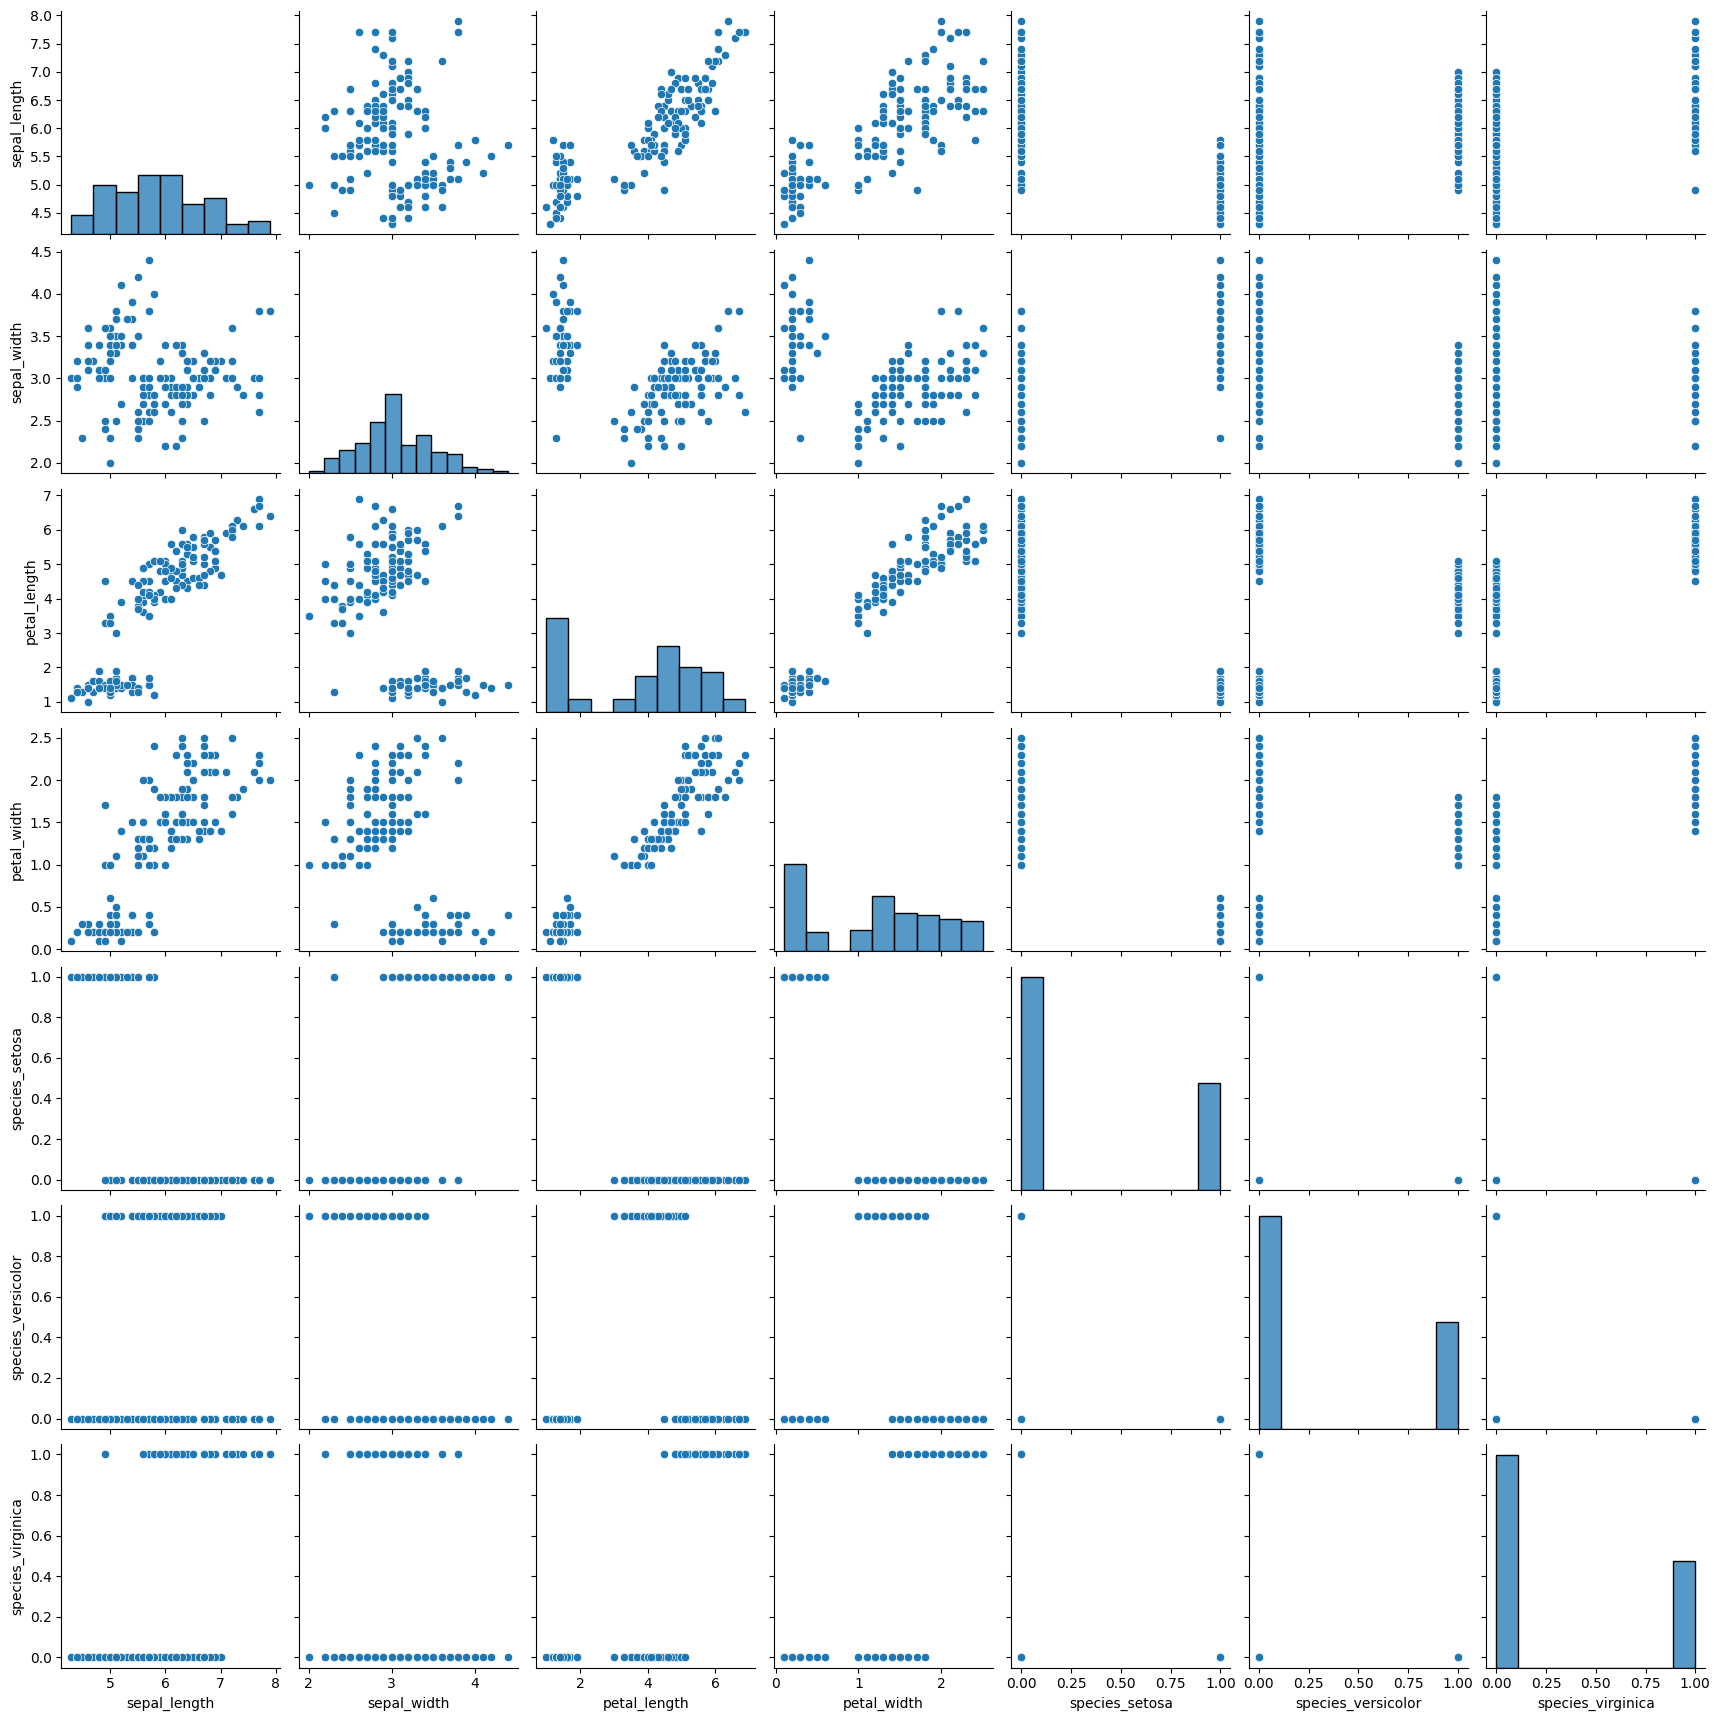

In [46]:
sns.pairplot(df)
plt.show()

#1. LE DATASET


In [47]:
# La matrice

x=df["petal_length"]
x.shape
x=np.array(x).reshape(x.shape[0],1)

In [48]:
x.shape

(150, 1)

In [49]:
X = np.hstack((x**2,x, np.ones(x.shape)))
X.shape

(150, 3)

In [50]:
#Le vecteur y

y = df["petal_width"]
y=np.array(y).reshape(y.shape[0],1)
y.shape

(150, 1)

In [51]:
#le vecteur theta

theta = np.random.rand(3,1)
print(theta.shape)

(3, 1)


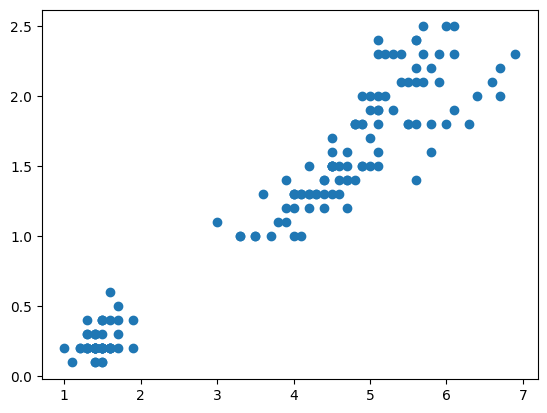

In [52]:
plt.scatter(x,y)

#Le modele

In [53]:
def model(X, theta):
  return np.dot(X, theta)

In [54]:
model(X, theta)

array([[ 2.26120282],
       [ 2.26120282],
       [ 2.08025922],
       [ 2.45169126],
       [ 2.26120282],
       [ 2.86130265],
       [ 2.26120282],
       [ 2.45169126],
       [ 2.26120282],
       [ 2.45169126],
       [ 2.45169126],
       [ 2.65172454],
       [ 2.26120282],
       [ 1.74700652],
       [ 1.90886045],
       [ 2.45169126],
       [ 2.08025922],
       [ 2.26120282],
       [ 2.86130265],
       [ 2.45169126],
       [ 2.86130265],
       [ 2.45169126],
       [ 1.59469742],
       [ 2.86130265],
       [ 3.30909339],
       [ 2.65172454],
       [ 2.65172454],
       [ 2.45169126],
       [ 2.26120282],
       [ 2.65172454],
       [ 2.65172454],
       [ 2.45169126],
       [ 2.45169126],
       [ 2.26120282],
       [ 2.45169126],
       [ 1.90886045],
       [ 2.08025922],
       [ 2.26120282],
       [ 2.08025922],
       [ 2.45169126],
       [ 2.08025922],
       [ 2.08025922],
       [ 2.08025922],
       [ 2.65172454],
       [ 3.30909339],
       [ 2

Text(0, 0.5, 'Largeur de petale')

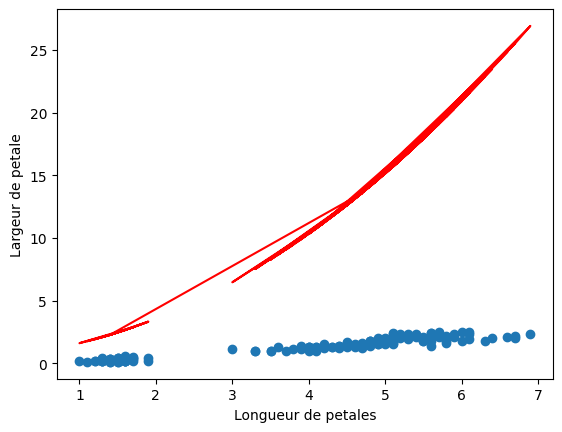

In [55]:
plt.scatter(x,y)
plt.plot(x, model(X, theta),c="red")
plt.xlabel("Longueur de petales")
plt.ylabel("Largeur de petale")

La fonction cout

In [56]:
def cost_function(X, y, theta):
  return 1/(2*len(y))*np.sum((model(X, theta) - y)**2)

In [57]:
cost_function(X, y, theta)

64.98412885725546

4. L'algorithme du gradient descendant

In [58]:
def deriv(X, y, theta):
  return 1/len(y) * np.dot(X.T , (model(X, theta) - y))

In [59]:
def grad_desc(X, y, theta, lrn_rate, n_iter):
  cost_arch = np.zeros(n_iter)
  for i in range(0, n_iter):
    theta = theta - lrn_rate * deriv(X, y, theta)
    cost_arch[i] = cost_function(X, y, theta)
  return theta, cost_arch

5. Entrainement du modele

In [68]:
lrn_rate = 1e-3
n_iter = 1000

theta_optimal, cost_arch=grad_desc(X, y, theta, lrn_rate, n_iter)

print(theta_optimal)

[[0.0216083 ]
 [0.15620232]
 [0.36724999]]


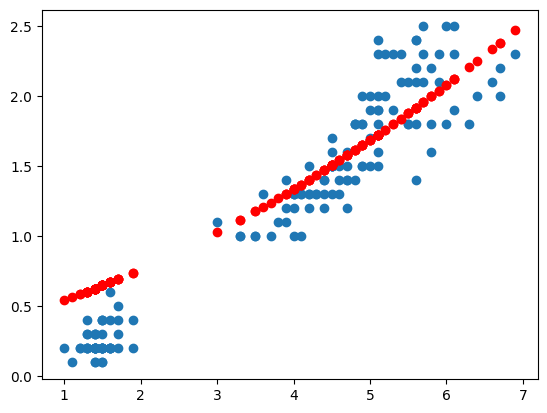

In [72]:
predictions = model(X, theta_optimal)
plt.scatter(x,y)
plt.scatter(x, predictions, c='red')

Text(0, 0.5, 'fonction cout')

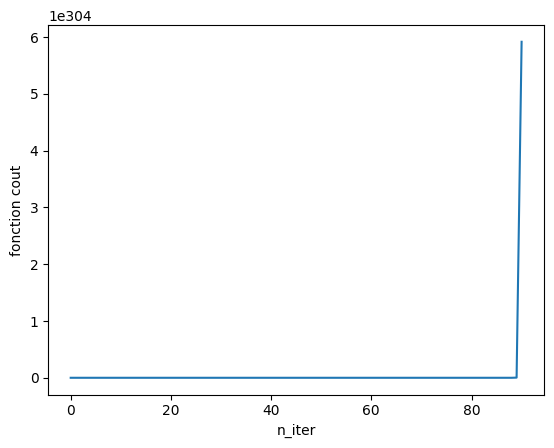

In [62]:
plt.plot(range(n_iter), cost_arch)
plt.xlabel("n_iter")
plt.ylabel("fonction cout")

# 6. Coefficient de determination

In [63]:
def coeff_determ(y, pred):
  num= ((y-pred)**2).sum()
  denom= ((y-y.mean())**2).sum()
  return 1 - num/denom

In [64]:
coeff_determ(y, predictions)

nan

In [65]:
theta_optimal

array([[nan],
       [nan],
       [nan]])

In [66]:
predict_width = theta_optimal[0]*8 + theta_optimal[1]

In [67]:
predict_width

array([nan])